## > Gerando data sensível falsa.

In [1]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
#sensitive_data_gen.write_csv_cpf_random(name="cpf_list_mix_treino.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_cpf_random(name="cpf_list_mix_teste.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_cpf_random(name="dataset_cpf_list_mix.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_treino.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_sensitive_only(name="apenas_dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)

### Imports de bibliotecas importantes

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from plot_history_helper import plot_history_accuracy, plot_history_loss
from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
# clear_session() -> limpa o estado da antiga sessão.

## Testando modelo para uma coluna de dados misturados, [Coluna, Classe].

### Leitura de dados de treino

In [3]:
# SESSÃO DE TREINAMENTO.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_train = pd.read_csv("./cpf_list_mix_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
  if X_train[i].dtypes == 'object':
    X_train[i] = le.fit_transform(X_train[i])

y_train = X_train["Classe"]
X_train.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values
# FIM SESSÃO DE TREINAMENTO.

                           Coluna A  Classe
0               Projetista mecânico       0
1                    125.096.473-34       1
2    Instalador de linha telefônica       0
3                        Urologista       0
4                    581.936.027-30       1
..                              ...     ...
994                           Caixa       0
995                  184.596.703-84       1
996                     Continuista       0
997                       Ombudsman       0
998                 Traumatologista       0

[999 rows x 2 columns]


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_992\2503926590.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Leitura de dados de teste.

In [4]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_test = pd.read_csv("./cpf_list_mix_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)


# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

y_test = X_test["Classe"]
X_test.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values
# FIM SESSÃO DE TESTE.

                    Coluna A  Classe
0             673.284.519-55       1
1                    Maestro       0
2             348.069.215-05       1
3                  Meredeira       0
4             Cerimonialista       0
..                       ...     ...
994  Engenheiro de alimentos       0
995                 Mecânico       0
996           310.267.845-90       1
997               Aeroviário       0
998     Segurança particular       0

[999 rows x 2 columns]


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_992\2450308004.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criando o modelo.

In [5]:
from keras import layers
print(X_train.shape[1])
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model_col1 = keras.Sequential()
model_col1.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model_col1.add(keras.layers.Dense(8, input_dim = input_dim, activation='relu'))
model_col1.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model_col1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_col1.summary() # Mostra os paramestros disponíveis para treinar

1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


### Treinamento e validação deste modelo.

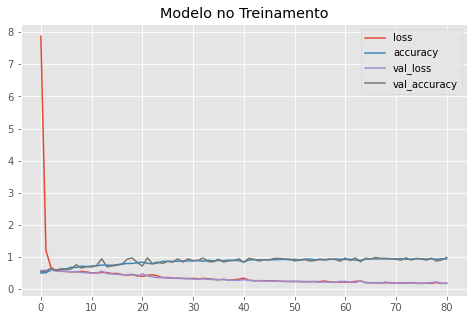

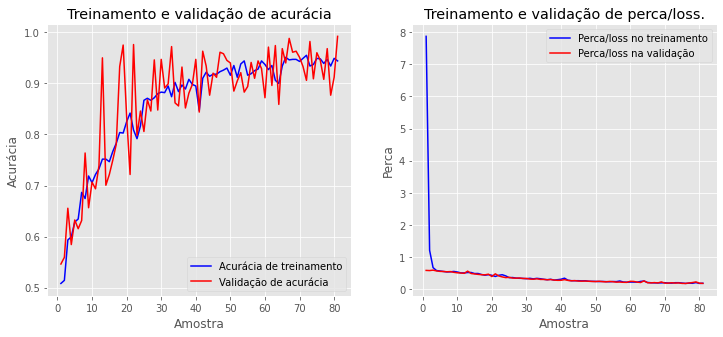

In [6]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

# Treinando o modelo.
history = model_col1.fit(
  X_train,
  y_train,
  epochs=100,
  verbose=False,
  validation_data=(X_test, y_test),
  batch_size=50,
  callbacks =[earlystopping]
)

# Mostrando resultados do treinamento com dataset de train.
pd.DataFrame(history.history).plot(figsize=(8,5))
plot.title('Modelo no Treinamento')
plot.show()

plot_history(history)
print()

### Avaliação deste modelo.

In [7]:

loss, accuracy = model_col1.evaluate(X_test, y_test, verbose=1, batch_size=32)
print(f"Acurácia no teste: {accuracy}")
print(f"Perca no teste: {loss}")

32/32 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9449
Acurácia no teste: 0.9449449181556702
Perca no teste: 0.1818000227212906


### Dataset para realizar a previsão do modelo.

In [8]:
dataset = pd.read_csv("./dataset_cpf_list_mix.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

#print(dataset)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                 Coluna A  Classe
0              Petroleiro       0
1          983.754.162-82       1
2    Assistente de câmera       0
3          751.023.948-60       1
4          308.765.294-65       1
..                    ...     ...
994        248.170.356-17       1
995    Militar da Marinha       0
996        015.932.847-05       1
997          Escriturário       0
998           Caldeireiro       0

[999 rows x 2 columns]


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_992\3342128598.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


In [9]:
model_col1.summary()
print("________________________________Previsão_________________________________")
predict_x=model_col1.predict(dataset[:100]) 
classes_x=np.argmax(predict_x, axis=1)
print(f"{predict_x}, {classes_x}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
________________________________Previsão_________________________________
4/4 [==============================] - 0s 2ms/step
[[0.02468404]
 [0.30638117]
 [0.23529921]
 [0.62959504]
 [0.95886713]
 [0.04705299]
 [0.0446568 ]
 [0.38025907]
 [0.90749526]
 [0.44386414]
 [0.36490494]
 [0.831066  ]
 [0.01112559]
 [0.5718564 ]
 

In [10]:
# Mostrando as previsões
for i in range(100):
	print(f"X={dataset[i]} Previsão={predict_x[i]}")

X=[776] Previsão=[0.02468404]
X=[515] Previsão=[0.30638117]
X=[548] Previsão=[0.23529921]
X=[392] Previsão=[0.62959504]
X=[153] Previsão=[0.95886713]
X=[715] Previsão=[0.04705299]
X=[720] Previsão=[0.0446568]
X=[485] Previsão=[0.38025907]
X=[232] Previsão=[0.90749526]
X=[461] Previsão=[0.44386414]
X=[491] Previsão=[0.36490494]
X=[295] Previsão=[0.831066]
X=[850] Previsão=[0.01112559]
X=[414] Previsão=[0.5718564]
X=[787] Previsão=[0.02194302]
X=[494] Previsão=[0.35732052]
X=[70] Previsão=[0.983015]
X=[710] Previsão=[0.04957035]
X=[172] Previsão=[0.9498261]
X=[156] Previsão=[0.9575514]
X=[532] Previsão=[0.2682835]
X=[411] Previsão=[0.57988757]
X=[193] Previsão=[0.9376558]
X=[340] Previsão=[0.7502928]
X=[747] Previsão=[0.03360538]
X=[209] Previsão=[0.9265879]
X=[627] Previsão=[0.11464242]
X=[753] Previsão=[0.03153526]
X=[465] Previsão=[0.4330747]
X=[505] Previsão=[0.33014387]
X=[557] Previsão=[0.2180184]
X=[606] Previsão=[0.14014496]
X=[168] Previsão=[0.9518741]
X=[709] Previsão=[0.050089

### Comparando os 6 primeiros resultados anteriores lado a lado:
*Ultima iteração feita no modelo 2.0*
1. Petroleiro,0             | X=[776] Previsão=[0.04203822]

2. 983.754.162-82,1         | X=[515] Previsão=[0.35146546]

3. Assistente de câmera,0   | X=[548] Previsão=[0.2828425]

4. 751.023.948-60,1		      | X=[392] Previsão=[0.6392239]

5. 308.765.294-65,1		      | X=[153] Previsão=[0.94653213]

6. Lavador,0                | X=[715] Previsão=[0.0731863]

## > Testando agora um modelo, ainda Sequencial, mas com dataset formado por 3 colunas - [Coluna A, Coluna B, Coluna C, Classe].

## > Lendo CSV e criando dados de teste e treino com 3 colunas para o modelo.

### Lendo dados de treinamento

In [11]:
clear_session()
# SESSÃO DE TREINAMENTO.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_train = pd.read_csv("./dados_sensiveis_mix_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# # Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

print(X_train)

y_train = X_train["Classe"]
X_train.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values
# FIM SESSÃO DE TREINAMENTO.

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_992\1593972125.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Lendo dados de teste.

In [12]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

#print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

print(X_test)

y_test = X_test["Classe"]
X_test.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values
# FIM SESSÃO DE TESTE.

                Coluna A          Coluna B             Coluna C  Classe
0             Caio Sales  4338960286895990         61 0186 3082       1
1    Sra. Clara Silveira  3575708029479091  +55 (081) 8085-4262       1
2            Diogo Cunha  2250213920610567         21 5979-7957       1
3         Pietro Pereira  5473615923423406      (084) 7681-8755       1
4            Maria Gomes     Android 5.0.1            Chargista       0
..                   ...               ...                  ...     ...
994      Bernardo Castro       Android 3.1      Perito criminal       0
995       Helena Almeida  2295591628111286         41 4577-5196       1
996  Enzo Gabriel Aragão  6500627849181641      (051) 7840 6156       1
997   Gabrielly da Cunha   180022558844045  +55 (051) 6128-1259       1
998        Stella Araújo  4907142878366588     +55 71 4365 5104       1

[999 rows x 4 columns]
    Coluna A Coluna B Coluna C  Classe
0          0        0        0       1
1          1        1        1    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_992\2461429639.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criação de modelo

In [62]:
from keras import layers
print(f"Entradas a serem criadas no modelo: {X_train.shape[1]}")
input_dim = X_train.shape[1]

clear_session()

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
#model.add(layers.Embedding(input_dim=150, output_dim=100, input_length=3))
#model.add(layers.Flatten())
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(8, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(4, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
])
model.summary() # Mostra os paramestros disponíveis para treinar

Entradas a serem criadas no modelo: 3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________


### Treinamento e teste do modelo.

In [63]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 10, restore_best_weights = True)

#Treinando o modelo.
#history = model.fit(
#  X_train,
#  y_train,
#  epochs=100,
#  verbose=2,
#)

#Mostrando resultados do treinamento com dataset de train.
#pd.DataFrame(history.history).plot(figsize=(8,5))
#plot.show()

# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=100,
  verbose=False,
  validation_data=(X_test, y_test),
  batch_size=50,
  callbacks =[earlystopping]
)

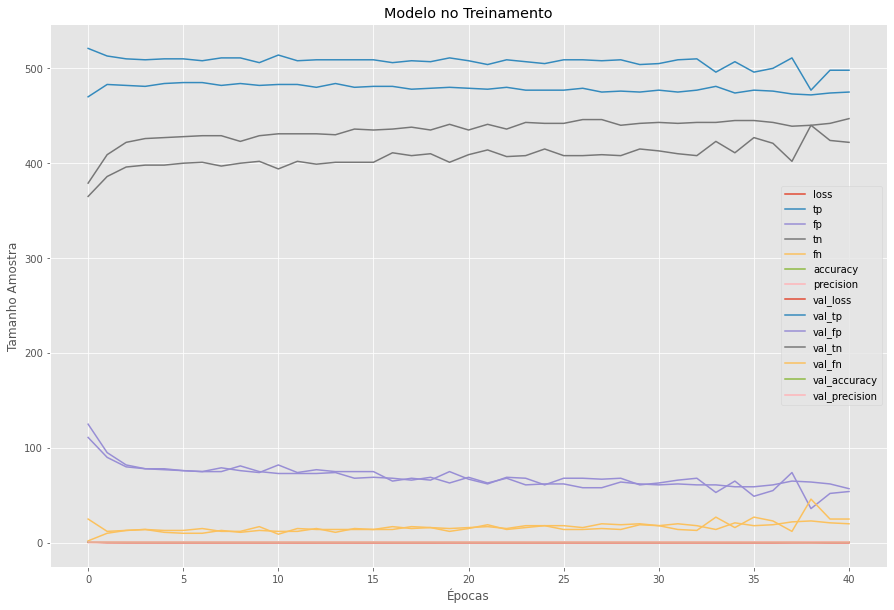

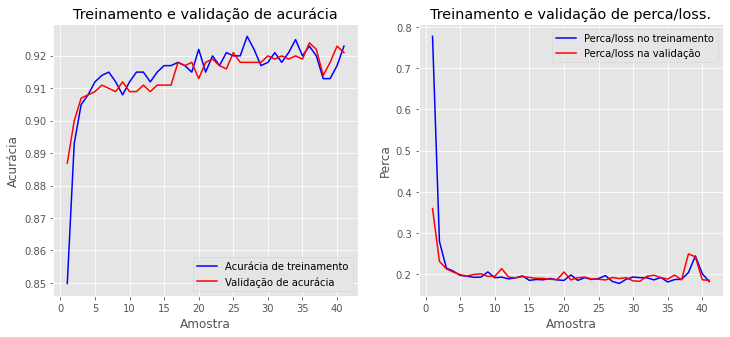

In [64]:
# Mostrando resultados do treinamento com dataset de train.
df = pd.DataFrame(history.history).plot(figsize=(15,10))
plot.xlabel('Épocas')
plot.ylabel('Tamanho Amostra')
plot.title('Modelo no Treinamento')
plot.show()

plot_history(history)
print()

### Realizando a Avaliação do modelo utilizando os dados de teste.

In [65]:

loss, tp, fp, tn, fn, accuracy, precision = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
#loss, accuracy = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
print(f"Acurácia no teste: {accuracy}")
print(f"Perca no teste: {loss}")

32/32 [==============================] - 0s 3ms/step - loss: 0.1836 - tp: 505.0000 - fp: 63.0000 - tn: 413.0000 - fn: 18.0000 - accuracy: 0.9189 - precision: 0.8891  
Acurácia no teste: 0.9189189076423645
Perca no teste: 0.18355530500411987


### Realizando previsão no dataset de teste.

In [68]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________
> Realizando a previsão.
32/32 [==========================

In [69]:
# Mostrando as previsões
for i in range(len(X_test)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, y_test={y_test[i]}")

X=[0 0 0] Previsão=[0.45218265], y_test=1
X=[1 1 1] Previsão=[0.44472256], y_test=1
X=[2 2 2] Previsão=[0.4335598], y_test=1
X=[3 3 3] Previsão=[0.4225238], y_test=1
X=[4 4 4] Previsão=[0.41170564], y_test=0
X=[5 5 5] Previsão=[0.4038569], y_test=1
X=[6 6 6] Previsão=[0.39640573], y_test=0
X=[7 7 7] Previsão=[0.39206368], y_test=0
X=[8 8 8] Previsão=[0.39660478], y_test=1
X=[9 9 9] Previsão=[0.40116373], y_test=0
X=[10 10 10] Previsão=[0.4057398], y_test=1
X=[11 11 11] Previsão=[0.41033238], y_test=0
X=[12 12 12] Previsão=[0.4149406], y_test=1
X=[13 13 13] Previsão=[0.41956383], y_test=0
X=[14 14 14] Previsão=[0.42420113], y_test=1
X=[15 15 15] Previsão=[0.42885184], y_test=1
X=[16 16 16] Previsão=[0.43351498], y_test=1
X=[17 17 17] Previsão=[0.4381902], y_test=0
X=[18 18 18] Previsão=[0.44287646], y_test=0
X=[19 19 19] Previsão=[0.44757262], y_test=0
X=[20 20 20] Previsão=[0.452403], y_test=0
X=[21 21 21] Previsão=[0.45729622], y_test=1
X=[22 22 22] Previsão=[0.46219802], y_test=0
X=[

### Realizando uma previsão com um dataset com dados sensíveis misturados com dados não sensíveis.

In [70]:
dataset = pd.read_csv("./dataset_dados_sensiveis_mix.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

print(dataset)

# Fazendo o pré processamento.
#le = preprocessing.LabelEncoder()
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_992\3886828975.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


### Previsão

In [71]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(dataset) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________
> Realizando a previsão.
32/32 [==========================

In [72]:
# Mostrando as previsões
for i in range(len(dataset)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, classe={classes[i]}")

X=[0 0 0] Previsão=[0.45218265], classe=0
X=[1 1 1] Previsão=[0.44472256], classe=1
X=[2 2 2] Previsão=[0.4335598], classe=1
X=[3 3 3] Previsão=[0.4225238], classe=1
X=[4 4 4] Previsão=[0.41170564], classe=1
X=[5 5 5] Previsão=[0.4038569], classe=1
X=[6 6 6] Previsão=[0.39640573], classe=1
X=[7 7 7] Previsão=[0.39206368], classe=1
X=[8 8 8] Previsão=[0.39660478], classe=0
X=[9 9 9] Previsão=[0.40116373], classe=0
X=[10 10 10] Previsão=[0.4057398], classe=1
X=[11 11 11] Previsão=[0.41033238], classe=1
X=[12 12 12] Previsão=[0.4149406], classe=0
X=[13 13 13] Previsão=[0.41956383], classe=0
X=[14 14 14] Previsão=[0.42420113], classe=1
X=[15 15 15] Previsão=[0.42885184], classe=1
X=[16 16 16] Previsão=[0.43351498], classe=1
X=[17 17 17] Previsão=[0.4381902], classe=0
X=[18 18 18] Previsão=[0.44287646], classe=0
X=[19 19 19] Previsão=[0.44757262], classe=0
X=[20 20 20] Previsão=[0.452403], classe=0
X=[21 21 21] Previsão=[0.45729622], classe=0
X=[22 22 22] Previsão=[0.46219802], classe=0
X=[

</hr>

## > Resultado obtido (Modelo salvo na pasta model/2.0)
### Previsão no dataset de teste.
![Resultado de previsão do teste](./assets/img/model_2.0_sequential_test_predict.png)
### Previsão em um dataset diferente(dataset_dados_sensiveis_mix.csv), sem treinamento prévio no dataset.
![Resultado de previsão do teste](./assets/img/model_2.0_sequential_dataset_predict.png)

* Com um dataset de tamanho relativamente pequeno, foi possível encontrar um modelo de acurácia maior que 80% durante o fitting.


### Agora será testado 10 módelos e feito a média entre eles para verificar se o modelo e os métodos utilizados foram feitos de maneira desejada.

### Criando 10 modelos e pegando 10 pedaços do dataset para comparar precisão entre os modelos Sequenciais

In [29]:
import matplotlib.pyplot as plot
import numpy as np
import random
from plot_history_helper import plot_history
from keras import callbacks
from sklearn.model_selection import StratifiedKFold


# Seed fix para poder reproduzir o "teste".
seed = random.randint(0, 32)
np.random.seed(seed)

#X = pd.read_csv("./dados_sensiveis_com_classes.csv")
#X.fillna(X.mean(), inplace=True)

X = pd.read_csv("./dados_sensiveis_mix_com_classes.csv")
X.fillna(X.mean(), inplace=True)

columns = list(X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])

y = X["Classe"]
X.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
y = y.values

# Pegando 10 cortes do dataset original de maneira aleatória.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores:list = []
# Criando 10 modelos com 10 datasets cortados pegos do dataset original e depois comparando os resultados.
list_of_models:list = []
for train, test in kfold.split(X, y):
  clear_session()
  #print(test, train)
  # Salvando os melhores pesos.
  earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
  # modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
  input_dim = X.shape[1]
  model = keras.Sequential()
  model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  # Configurando o modelo de treinamento.
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
  ])
  model.summary() # Mostra os paramestros disponíveis para treinar
  #Treinando o modelo.
  history = model.fit(
    X[train],
    y[train],
    epochs=100,
    verbose=0,
  )
  loss, tp, fp, tn, fn, scores, precision, = model.evaluate(X[test], y[test], verbose=0)
  print(f"%s: %.2f%%" % (model.metrics_names[1], scores*100))
  cvscores.append(scores * 100)
  list_of_models.append((model, (scores * 100)))

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_13588\491545293.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)

### Lista de modelos, resultados deles e média de acurácia.

In [30]:
for model, score in list_of_models:
  print(model, score)
print("Média: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

<keras.engine.sequential.Sequential object at 0x0000025BE1E4CF40> 92.00000166893005
<keras.engine.sequential.Sequential object at 0x0000025BE1E4E590> 89.99999761581421
<keras.engine.sequential.Sequential object at 0x0000025BE4340A00> 87.99999952316284
<keras.engine.sequential.Sequential object at 0x0000025BE43412A0> 95.99999785423279
<keras.engine.sequential.Sequential object at 0x0000025BD89302B0> 97.00000286102295
<keras.engine.sequential.Sequential object at 0x0000025BE8F04700> 91.00000262260437
<keras.engine.sequential.Sequential object at 0x0000025BE55B1870> 97.00000286102295
<keras.engine.sequential.Sequential object at 0x0000025BDFB36C50> 87.99999952316284
<keras.engine.sequential.Sequential object at 0x0000025BDAFA7760> 94.9999988079071
<keras.engine.sequential.Sequential object at 0x0000025BE4369AE0> 92.92929172515869
Média: 92.69% (+/- 3.29%)


### Selecionando o melhor modelo Sequencial dos 10 criados.

In [31]:
maximum = 0
for k, v in list_of_models:
  #print(k, v)
  if v > maximum:
    maximum = v
    m = k
model = m
best_score = maximum

print("Melhor modelo com a maior avaliação escolhida:")
print(model, best_score)

Melhor modelo com a maior avaliação escolhida:
<keras.engine.sequential.Sequential object at 0x0000025BD89302B0> 97.00000286102295


## Olhando o resultado acima, podemos dizer que o modelos criados possuem um desempenho relativamente bom, considerando que a média esperada é de 70% até 90%.

## > Avaliação do ultimo modelo criado no loop modelo.

### Criando o dataset.

In [152]:
# CRIANDO UM DATASET COM DADOS ALEATÓRIOS.
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_mix_com_classes.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_sensitive_only(name="dados_sensiveis_com_classes.csv", title=['Coluna A', 'Coluna B', 'Coluna C','Classe'], size=1000)

### Carregando um dataset médiano para avaliar o ultimo modelo criado no loop.

In [32]:
# Leitura da dataset.
X = pd.read_csv("./dados_sensiveis_mix_com_classes.csv")
X.fillna(X.mean(), inplace=True)

columns = list(X)
print("Antes de dropar a Classe Y: \n", X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

data:any = X

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])
        
y = X["Classe"]
X.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
y = y.values
print("Depois de dropar a Classe Y: \n", X)

Antes de dropar a Classe Y: 
                       Coluna A          Coluna B                   Coluna C  \
0               Yasmin Peixoto        Android 11                 Naturólogo   
1    Sra. Ana Lívia Nascimento       Android 7.0                  Atendente   
2          João Vitor Monteiro     Android 5.1.1                   Escultor   
3     Maria Fernanda das Neves       Android 1.6                    Ecólogo   
4         Maria Alice Monteiro  6011410271726098           +55 84 2448-3106   
..                         ...               ...                        ...   
994                Alice Viana  4299909535288371              0900-725-4465   
995             Lorena Freitas     Android 2.3.7                 Paramédico   
996               Rafael Cunha       Android 4.2                    Geólogo   
997            Beatriz da Mota     Android 4.2.2  Assistente administrativo   
998              Eloah Freitas       Android 4.0                  Separador   

     Classe  
0      

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_13588\264493589.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


### Avaliando o modelo com o dataset novo.

In [34]:
# Vendo versão final do resultado.
#clear_session()
loss, tp, fp, tn, fn, accuracy, precision = model.evaluate(X, y, verbose=2)
print(f"Acurácia no dataset: {accuracy}")
print(f"Perca no dataset: {loss}")

32/32 - 0s - loss: 0.1530 - tp: 446.0000 - fp: 43.0000 - tn: 486.0000 - fn: 24.0000 - accuracy: 0.9329 - precision: 0.9121 - 178ms/epoch - 6ms/step
Acurácia no dataset: 0.9329329133033752
Perca no dataset: 0.15301863849163055


### Verificando a previsão com os valores reais

In [35]:
model.summary()
predict_x=model.predict(X[:10]) 
classes_x=np.argmax(predict_x, axis=1)
for i in range(10):
	print(f"X={X[i]} Previsão={predict_x[i]} Y={y[i]}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 122ms/step
X=[0 0 0] Previsão=[0.22753523] Y=0
X=[1 1 1] Previsão=[0.22539431] Y=0
X=[2 2 2] Previsão=[0.24787481] Y=0
X=[3 3 3] Previsão=[0.27435976] Y=0
X=[4 4 4] Previsão=[0.3025363] Y=1
X=[5 5 5] Previsão=[0.33228147] Y=1
X=[6 6 6] Previsão=[0.36342722] Y=1
X=[7 7 7] Previsão

## Salvando o modelo na pasta models

In [73]:
filepath = "./model/2.5"
model.save(filepath)
keras.models.load_model(filepath)

INFO:tensorflow:Assets written to: ./model/2.5\assets


## Carregando o modelo da pasta models

In [49]:
model = tf.keras.models.load_model('./model/2.0')